In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [20]:
df_eco = pd.read_csv("/kaggle/input/gdp-and-productivity-of-indian-cities-2019-2024/Economy_Productivity_SD_India.csv")
df_gdp = pd.read_csv("/kaggle/input/gdp-and-productivity-of-indian-cities-2019-2024/GDP_Sector_Income_2019_2023_30Cities.csv")
df = pd.merge(left=df_eco,right=df_gdp,how='inner')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             75 non-null     object 
 1   Year                             75 non-null     int64  
 2   R&D Expenditure (% of GDP)       75 non-null     float64
 3   Patents per 100,000 Inhabitants  75 non-null     float64
 4   Unemployment Rate (%)            75 non-null     float64
 5   Youth Unemployment Rate (%)      75 non-null     float64
 6   SME Employment (%)               75 non-null     float64
 7   Tourism Sector Employment (%)    75 non-null     float64
 8   ICT Sector Employment (%)        75 non-null     float64
 9   GDP (in billion $)               75 non-null     float64
 10  Agriculture (%)                  75 non-null     float64
 11  Industry (%)                     75 non-null     float64
 12  Services (%)            

In [22]:
df.describe()

,Year,R&D Expenditure (% of GDP),"Patents per 100,000 Inhabitants",Unemployment Rate (%),Youth Unemployment Rate (%),SME Employment (%),Tourism Sector Employment (%),ICT Sector Employment (%),GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%)
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,2021.000000,1.166000,4.473333,6.084000,9.834667,27.805333,6.680000,15.844000,172.290667,12.454667,29.292000,40.650667,22.012000
std,1.423737,0.427883,1.619254,1.217556,1.056958,7.283263,1.587791,6.091581,69.667258,3.999030,5.761047,5.955360,7.734111
min,2019.000000,0.530000,1.500000,4.000000,8.100000,15.500000,4.100000,5.100000,59.800000,5.200000,20.100000,30.300000,10.100000
25%,2020.000000,0.785000,3.000000,5.150000,8.900000,20.750000,5.450000,9.600000,110.950000,9.200000,24.150000,35.450000,15.200000
50%,2021.000000,1.080000,5.000000,6.000000,9.900000,28.600000,6.500000,17.200000,175.300000,11.900000,29.100000,41.500000,20.800000
75%,2022.000000,1.510000,5.850000,7.200000,10.600000,33.900000,7.750000,21.350000,222.400000,15.400000,33.200000,45.600000,29.000000
max,2023.000000,1.950000,6.900000,8.000000,12.000000,39.600000,9.900000,24.900000,297.600000,19.900000,39.800000,49.300000,35.000000


## City Analysis

### city names and number

In [23]:
print(df['City'].unique())
print(f" Number of cities{df['City'].nunique()}")

df['Year'].unique()

['Ahmedabad' 'Bengaluru' 'Mumbai' 'Hyderabad' 'Chennai' 'Kolkata' 'Delhi'
 'Pune' 'Jaipur' 'Lucknow' 'Indore' 'Bhopal' 'Patna' 'Vadodara' 'Amritsar']
 Number of cities15


array([2019, 2020, 2021, 2022, 2023])

### Which city is at the top of (Agriculture Industry Services Technology Tourism ) over the period from[2019 , 2023]

In [24]:
sectors = df[['Agriculture (%)', 'Industry (%)' , 'Services (%)' , 'Technology (%)' , 'Tourism Sector Employment (%)'] ]
for year in df['Year'].unique():
    print(f"\nTop Cities for Each Sector in {year}:")
    df_year = df[df['Year'] == year]
    for sector in sectors:
        top_city = df_year.loc[df_year[sector].idxmax(), 'City']
        max_value = df_year[sector].max()
        print(f"{sector}: {top_city} ({max_value}%)")


Top Cities for Each Sector in 2019:
Agriculture (%): Amritsar (19.9%)
Industry (%): Mumbai (39.8%)
Services (%): Hyderabad (49.2%)
Technology (%): Amritsar (33.8%)
Tourism Sector Employment (%): Vadodara (9.5%)

Top Cities for Each Sector in 2020:
Agriculture (%): Chennai (17.1%)
Industry (%): Bhopal (39.0%)
Services (%): Ahmedabad (49.3%)
Technology (%): Patna (33.9%)
Tourism Sector Employment (%): Delhi (9.5%)

Top Cities for Each Sector in 2021:
Agriculture (%): Patna (18.6%)
Industry (%): Indore (35.5%)
Services (%): Bengaluru (48.9%)
Technology (%): Chennai (34.4%)
Tourism Sector Employment (%): Kolkata (9.9%)

Top Cities for Each Sector in 2022:
Agriculture (%): Vadodara (19.6%)
Industry (%): Ahmedabad (36.7%)
Services (%): Pune (48.9%)
Technology (%): Ahmedabad (31.8%)
Tourism Sector Employment (%): Indore (8.6%)

Top Cities for Each Sector in 2023:
Agriculture (%): Amritsar (19.1%)
Industry (%): Mumbai (39.5%)
Services (%): Vadodara (49.3%)
Technology (%): Kolkata (35.0%)
Tour

### Top cities leaning towards Technology Invoke 

In [25]:
sectors = df[['Patents per 100,000 Inhabitants' , 'ICT Sector Employment (%)' , 'R&D Expenditure (% of GDP)' ] ]
for year in df['Year' ].unique():
    print(f"\nTop Cities for Each Sector in {year}:")
    df_year = df[df['Year'] == year]
    for sector in sectors:
        top_city = df_year.loc[df_year[sector].idxmax(), 'City']
        max_value = df_year[sector].max()
        print(f"{sector}: {top_city} ({max_value}%)")


Top Cities for Each Sector in 2019:
Patents per 100,000 Inhabitants: Lucknow (6.7%)
ICT Sector Employment (%): Chennai (24.9%)
R&D Expenditure (% of GDP): Mumbai (1.75%)

Top Cities for Each Sector in 2020:
Patents per 100,000 Inhabitants: Lucknow (6.7%)
ICT Sector Employment (%): Patna (24.6%)
R&D Expenditure (% of GDP): Ahmedabad (1.93%)

Top Cities for Each Sector in 2021:
Patents per 100,000 Inhabitants: Ahmedabad (6.6%)
ICT Sector Employment (%): Bengaluru (24.8%)
R&D Expenditure (% of GDP): Indore (1.79%)

Top Cities for Each Sector in 2022:
Patents per 100,000 Inhabitants: Indore (6.9%)
ICT Sector Employment (%): Hyderabad (24.4%)
R&D Expenditure (% of GDP): Kolkata (1.92%)

Top Cities for Each Sector in 2023:
Patents per 100,000 Inhabitants: Pune (6.9%)
ICT Sector Employment (%): Vadodara (24.3%)
R&D Expenditure (% of GDP): Kolkata (1.95%)



### lowest cities in terms of Unemployment Rate (%)	Youth Unemployment Rate (%)

In [26]:
sectors = df[[ 'Unemployment Rate (%)','Youth Unemployment Rate (%)'] ]
for year in df['Year' ].unique():
    print(f"\nTop Cities for Each Sector in {year}:")
    df_year = df[df['Year'] == year]
    for sector in sectors:
        top_city = df_year.loc[df_year[sector].idxmin(), 'City']
        min_value = df_year[sector].min()
        print(f"{sector}: {top_city} ({min_value}%)")


Top Cities for Each Sector in 2019:
Unemployment Rate (%): Vadodara (4.0%)
Youth Unemployment Rate (%): Bengaluru (8.5%)

Top Cities for Each Sector in 2020:
Unemployment Rate (%): Indore (4.3%)
Youth Unemployment Rate (%): Amritsar (8.5%)

Top Cities for Each Sector in 2021:
Unemployment Rate (%): Vadodara (4.2%)
Youth Unemployment Rate (%): Amritsar (8.3%)

Top Cities for Each Sector in 2022:
Unemployment Rate (%): Bengaluru (4.3%)
Youth Unemployment Rate (%): Lucknow (8.4%)

Top Cities for Each Sector in 2023:
Unemployment Rate (%): Lucknow (4.2%)
Youth Unemployment Rate (%): Bhopal (8.1%)


## Visulization

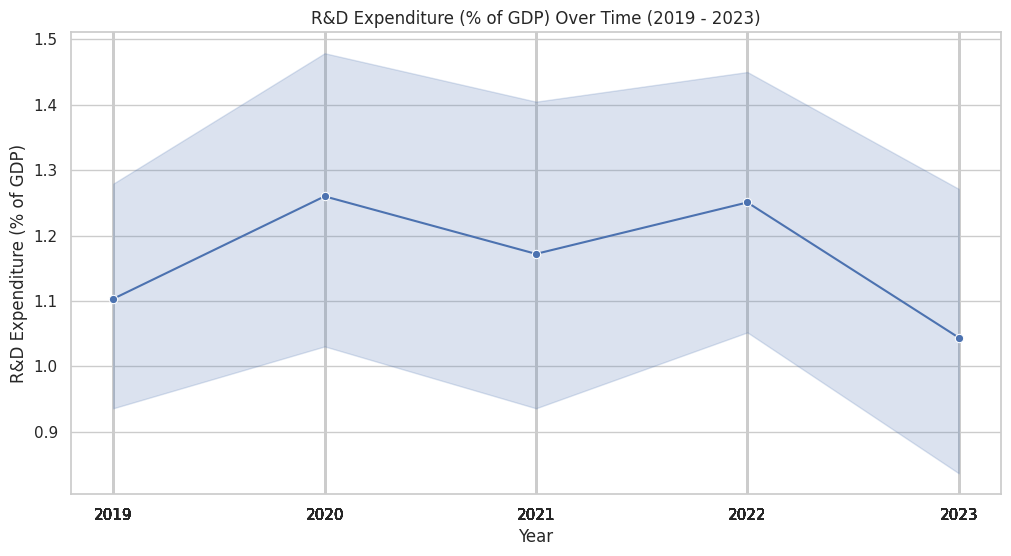

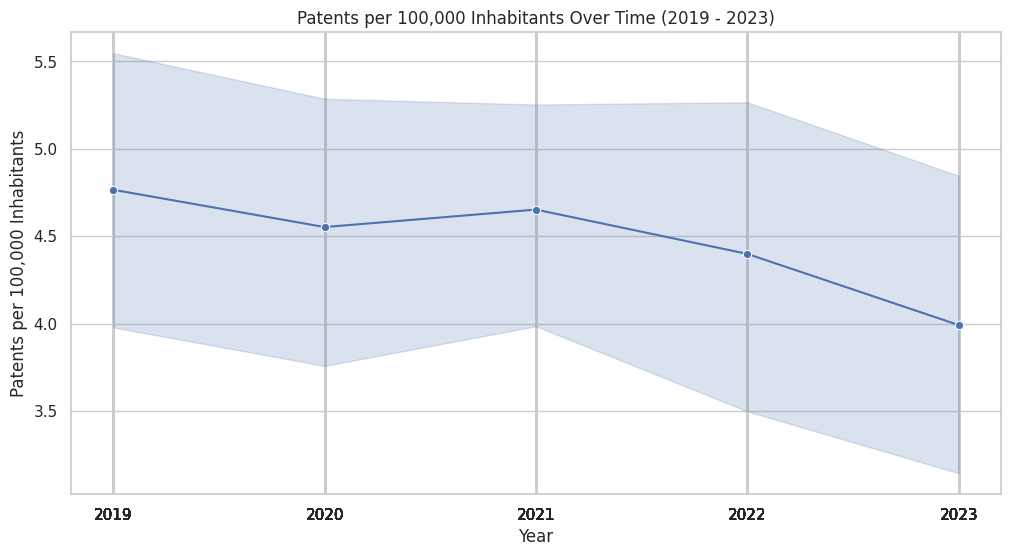

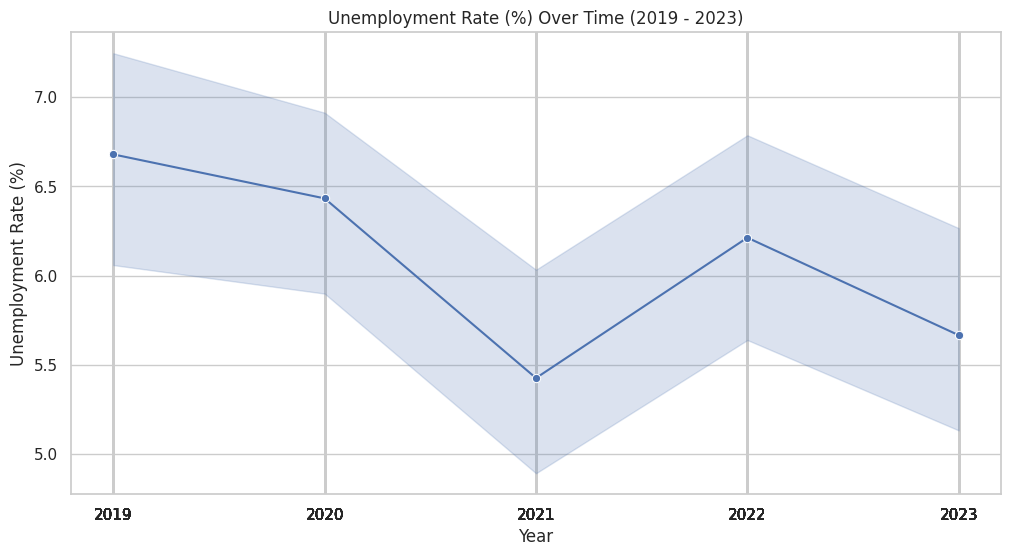

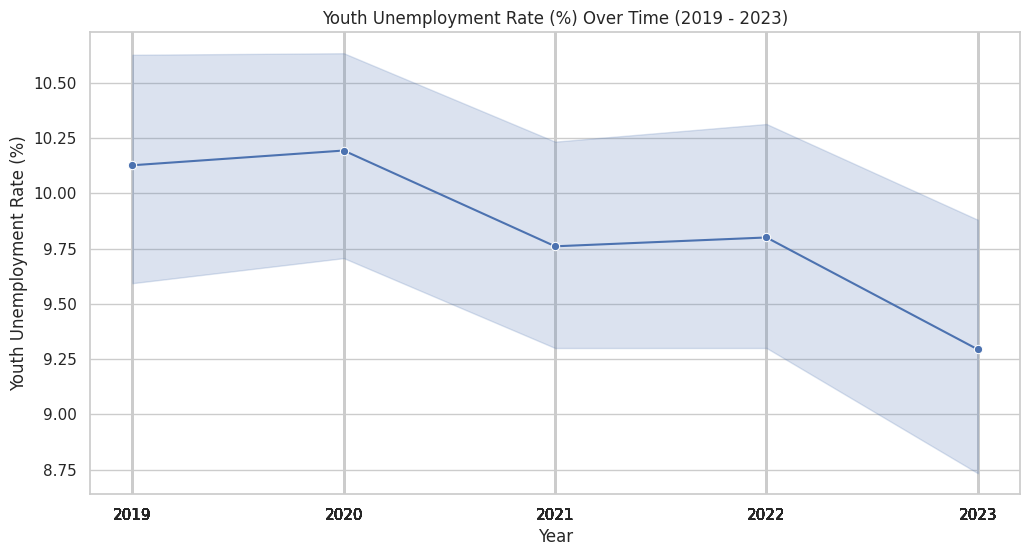

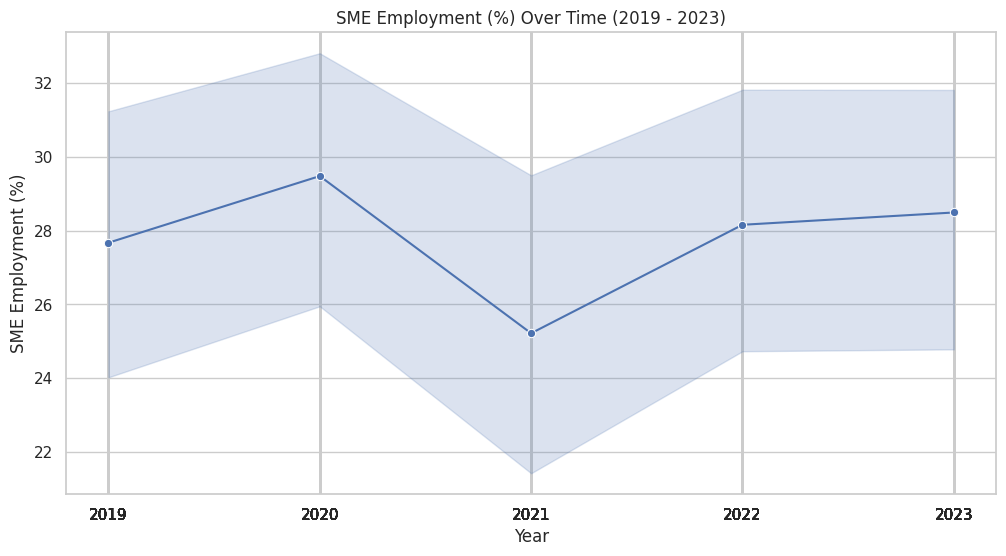

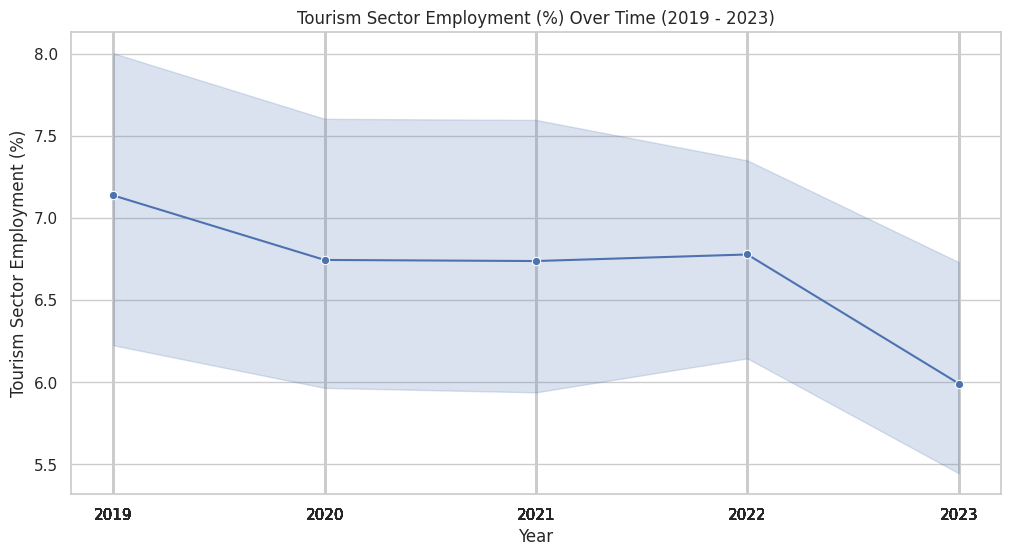

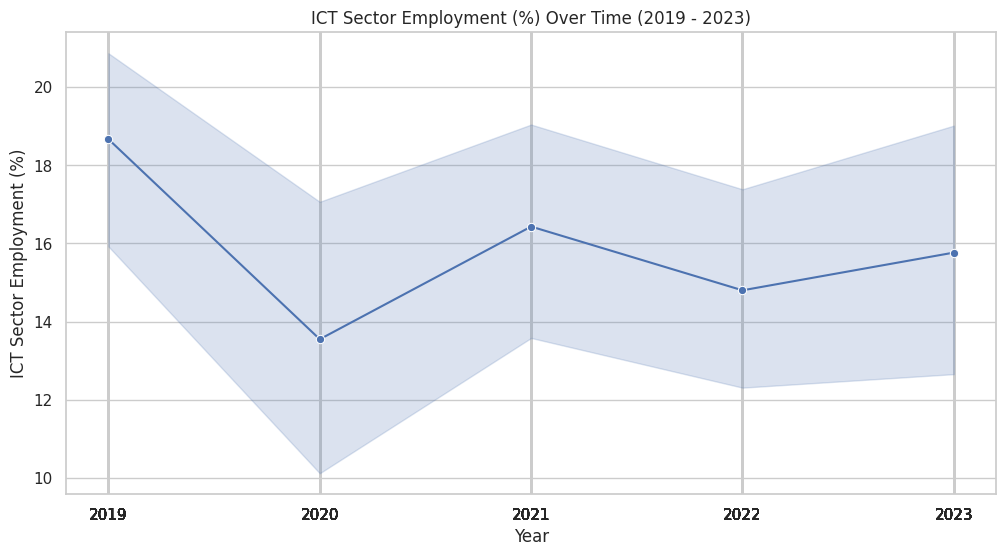

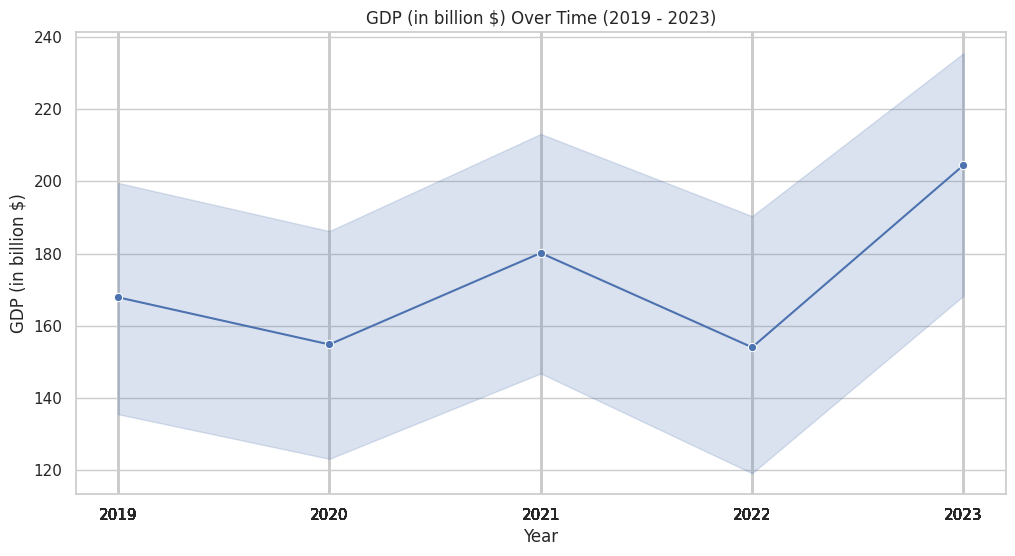

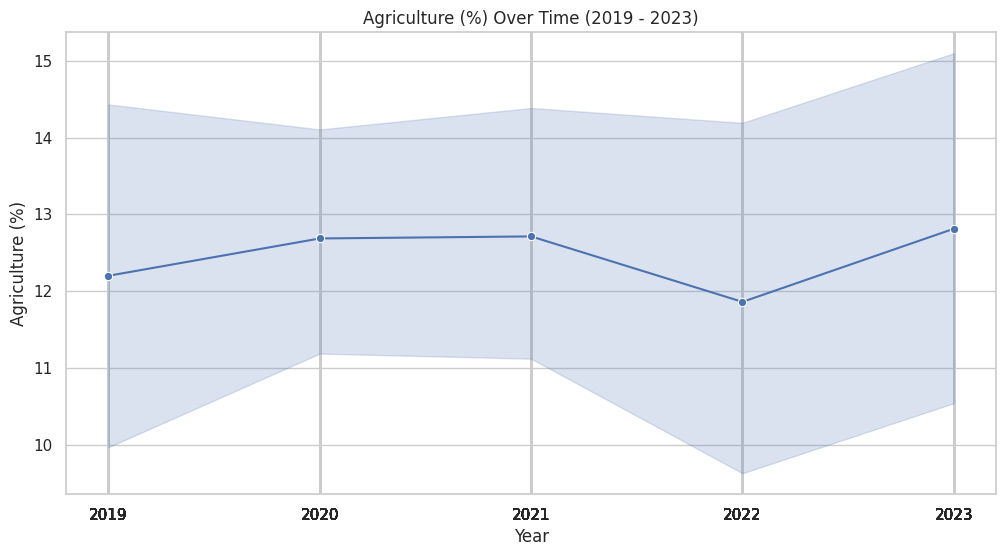

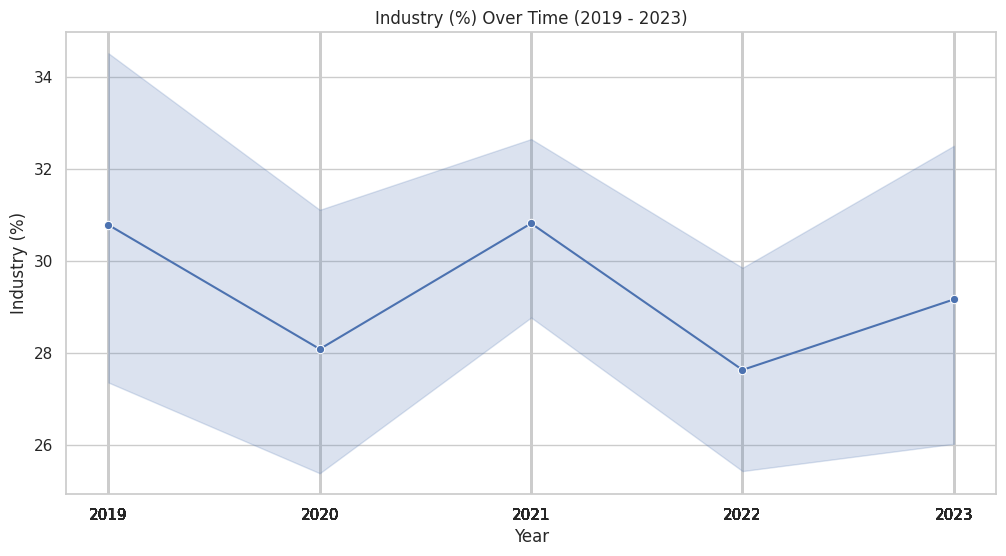

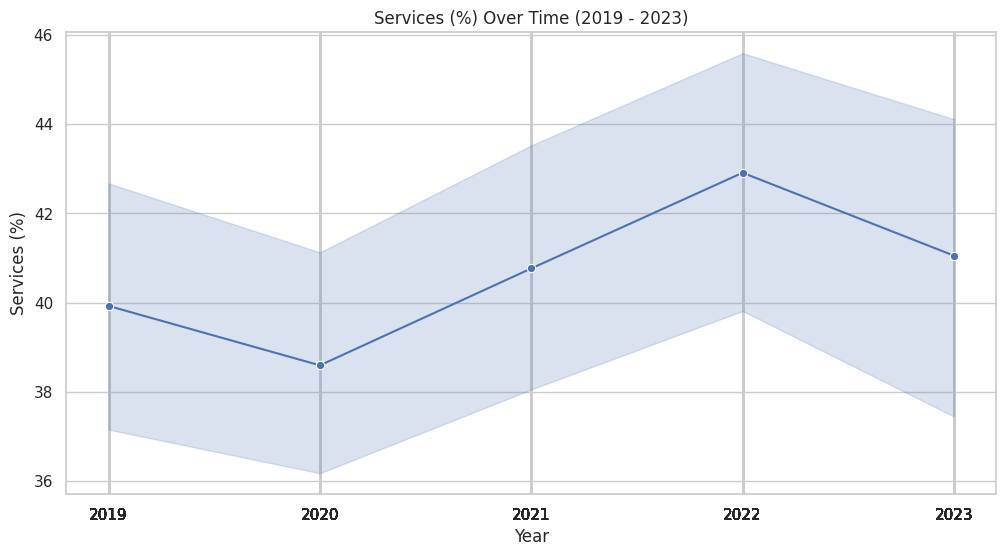

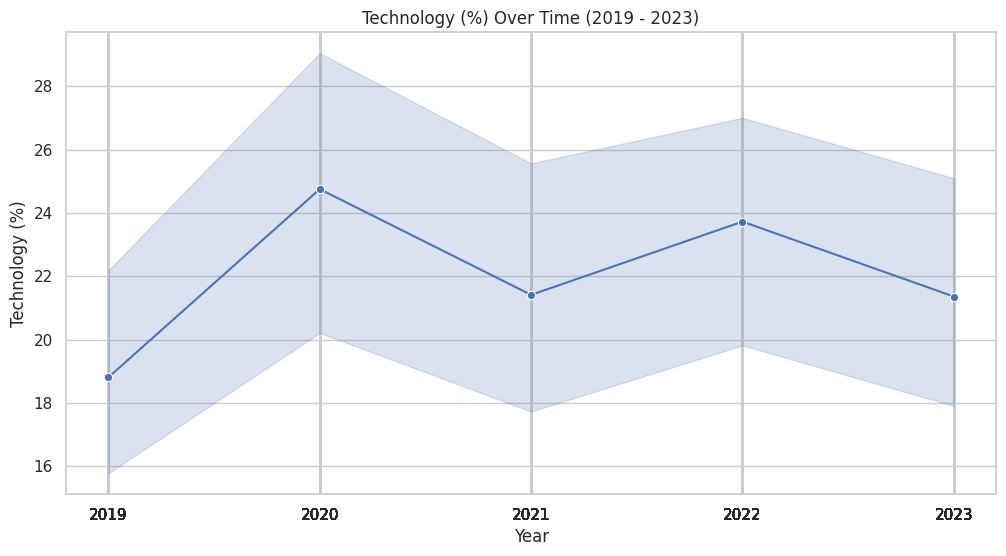

In [27]:
sns.set(style="whitegrid")

# Function to plot each data group over the years
def plot_all_data(df):
    for column in df.columns[2:]:  # Skip the 'Year' column
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Year', y=column, data=df, marker='o')
        plt.title(f'{column} Over Time (2019 - 2023)')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.xticks(df['Year'])  # Ensure all years are shown
        plt.grid(True)
        plt.show()

# Call the function to plot all data
plot_all_data(df)

## Cluster Analysis

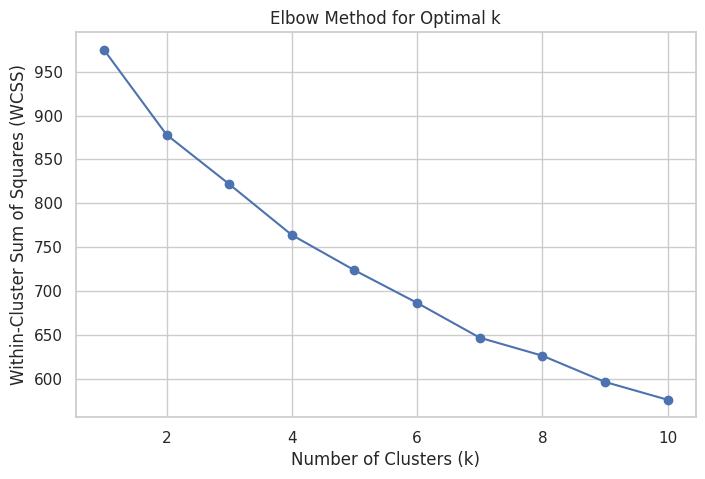

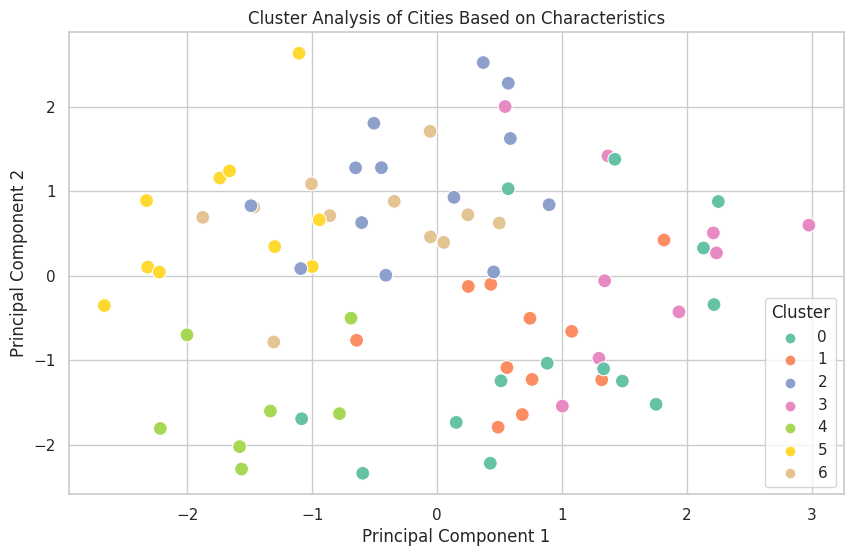

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Preparing the data: Remove non-numeric columns and standardize
features = df.drop(columns=['City'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using Elbow Method to determine the optimal number of clusters
def plot_elbow_method(scaled_data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.show()

plot_elbow_method(scaled_features)

# Applying K-means with optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualizing the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Cluster Analysis of Cities Based on Characteristics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display the clustered DataFrame



In [29]:
# After performing PCA as shown earlier

# Print the components to understand feature contribution
print("PCA Components:")
pca_components = pd.DataFrame(pca.components_, columns=features.columns, index=['PC1', 'PC2'])
pca_components


PCA Components:


,Year,R&D Expenditure (% of GDP),"Patents per 100,000 Inhabitants",Unemployment Rate (%),Youth Unemployment Rate (%),SME Employment (%),Tourism Sector Employment (%),ICT Sector Employment (%),GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%)
PC1,0.522463,-0.008127,-0.211874,-0.118297,-0.452839,-0.082995,-0.529165,-0.180673,0.163495,0.215316,-0.098738,0.243834,0.034304
PC2,-0.083145,0.097654,0.018326,0.108694,0.055718,0.253875,-0.146303,-0.447338,-0.527116,0.246308,-0.505267,-0.288111,0.074198


In [30]:
# Select only numeric columns for calculating means
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean for each cluster based on numeric columns only
cluster_means = df.groupby('Cluster')[numeric_features].mean()

print("Cluster Means:")
cluster_means


Cluster Means:


,Year,R&D Expenditure (% of GDP),"Patents per 100,000 Inhabitants",Unemployment Rate (%),Youth Unemployment Rate (%),SME Employment (%),Tourism Sector Employment (%),ICT Sector Employment (%),GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%),PC1,PC2
Cluster,,,,,,,,,,,,,,,
0,2022.142857,1.001429,3.714286,5.314286,8.971429,26.157143,6.421429,14.957143,233.328571,9.750000,30.207143,37.678571,21.157143,0.960601,-0.773876
1,2020.909091,1.563636,4.509091,6.045455,9.727273,22.481818,5.200000,17.690909,204.863636,11.036364,30.836364,45.372727,23.090909,0.679569,-0.790096
2,2020.692308,1.293846,4.853846,7.138462,9.900000,32.415385,6.484615,13.715385,130.284615,13.738462,25.853846,41.753846,16.915385,-0.168954,1.087492
3,2022.666667,0.740000,4.233333,5.688889,9.333333,28.866667,5.822222,17.066667,159.377778,17.800000,26.266667,45.633333,19.855556,1.656673,0.199129
4,2019.428571,0.987143,5.357143,6.114286,9.842857,27.314286,8.500000,18.400000,208.528571,11.285714,37.685714,42.200000,19.000000,-1.453527,-1.504688
5,2020.000000,0.999000,4.040000,5.920000,11.400000,34.800000,7.690000,16.980000,156.910000,9.820000,25.490000,35.860000,22.850000,-1.728590,0.682506
6,2020.545455,1.440909,4.981818,6.309091,9.945455,22.863636,7.345455,13.981818,113.163636,14.563636,31.236364,37.700000,30.963636,-0.561521,0.663956
